In [4]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Part one 

Cleaning the data 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(filepath):
    """Laadt de dataset en verwijdert rijen met missende gegevens."""
    data = pd.read_csv(filepath)
    cleaned_data = data.dropna()
    return cleaned_data

def main():
    filepath = 'https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv'
    
    data = load_and_clean_data(filepath)
    print(data.head())

if __name__ == "__main__":
    main()

   transaction_id transaction_date transaction_time  transaction_qty  \
1               2       03/13/2023         19:46:25                1   
2               3       03/18/2023         09:00:53                1   
3               4       03/16/2023         11:16:47                2   
4               5       03/18/2023         17:00:22                1   
6               7       03/13/2023         10:15:55                3   

   store_id store_location  unit_price product_category   product_type  
1       2.0        Utrecht         4.5        Chocolate  Hot chocolate  
2       3.0          Breda         3.0              Tea      Black tea  
3       2.0        Utrecht         3.0           Bakery          Scone  
4       3.0          Breda         4.5        Chocolate  Hot chocolate  
6       1.0      Amsterdam         3.5           Bakery            Pie  


Question 1 (compulsory):
The quantity of items sold varies per transaction. TTR would like to know what the probability is that a
transaction contains more than 2 items sold. Report and explain your analysis and conclusion.

In [11]:
import pandas as pd

def load_and_clean_data(filepath):
    """Loads the dataset and removes rows with missing data."""
    data = pd.read_csv(filepath)
    cleaned_data = data.dropna()
    return cleaned_data

def calculate_probability_more_than_two_items(data):
    """Calculate the probability that a transaction contains more than 2 items."""
    total_transactions = len(data)
    transactions_more_than_two_items = len(data[data['transaction_qty'] > 2])
    probability = transactions_more_than_two_items / total_transactions
    return probability

def main():
    filepath = 'https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv'
    
    data = load_and_clean_data(filepath)
    
 
    probability = calculate_probability_more_than_two_items(data)
    
    print(f"The probability that a transaction contains more than 2 items is {probability:.2%}.")

if __name__ == "__main__":
    main()



The probability that a transaction contains more than 2 items is 20.16%.


Conclusion question 1
The outcome of running this script will be a printed statement in the console that tells you the probability (as a percentage) that a transaction in the dataset contains more than 2 items. For example, if the output is The probability that a transaction contains more than 2 items is 20.00%., this means that based on the dataset provided, there's a 20% chance that any given transaction will have more than 2 items sold.

Question 2 (compulsory):
TTR would like to obtain insight in how the unit price varies for the product types that they sell. Conduct
appropriate analysis, report relevant descriptive statistics and use visualizations when reporting your
findings. Include skewness in your interpretation.

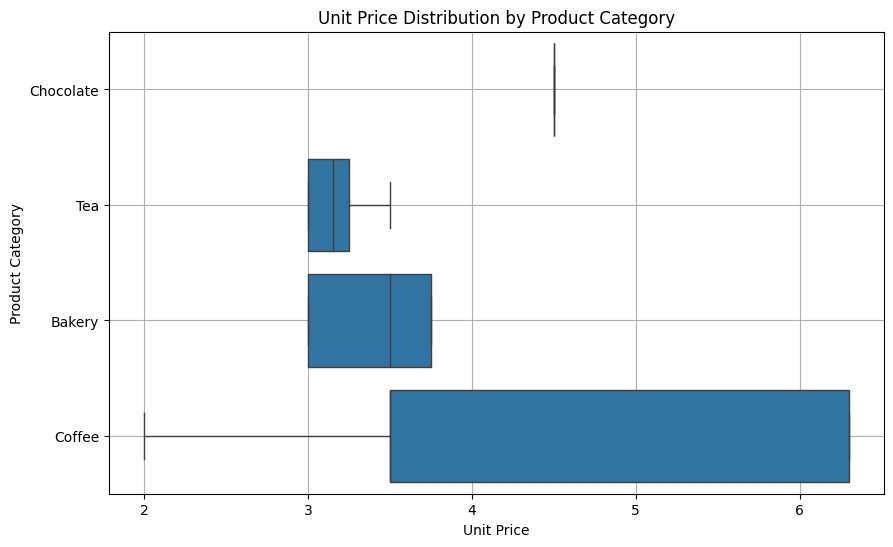

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv')

cleaned_data = data.dropna()

plt.figure(figsize=(10, 6))
sns.boxplot(x='unit_price', y='product_category', data=cleaned_data)
plt.title('Unit Price Distribution by Product Category')
plt.xlabel('Unit Price')
plt.ylabel('Product Category') 
plt.grid(True)
plt.show()


Descriptive Statistics and Skewness by Product Type:
              product_type   count  mean           std   min   25%   50%  \
0             Black coffee   448.0  2.00  0.000000e+00  2.00  2.00  2.00   
1                Black tea   469.0  3.00  0.000000e+00  3.00  3.00  3.00   
2                 Chai tea   456.0  3.25  0.000000e+00  3.25  3.25  3.25   
3                Green tea   438.0  3.15  8.891941e-16  3.15  3.15  3.15   
4               Herbal tea   437.0  3.50  0.000000e+00  3.50  3.50  3.50   
5            Hot chocolate  1780.0  4.50  0.000000e+00  4.50  4.50  4.50   
6              Milk coffee   474.0  3.50  0.000000e+00  3.50  3.50  3.50   
7   Organic blended coffee   472.0  6.30  1.778242e-15  6.30  6.30  6.30   
8                      Pie   604.0  3.50  0.000000e+00  3.50  3.50  3.50   
9                 Sandwich   606.0  3.75  0.000000e+00  3.75  3.75  3.75   
10                   Scone   598.0  3.00  0.000000e+00  3.00  3.00  3.00   
11            Syrup coffee   444.0 

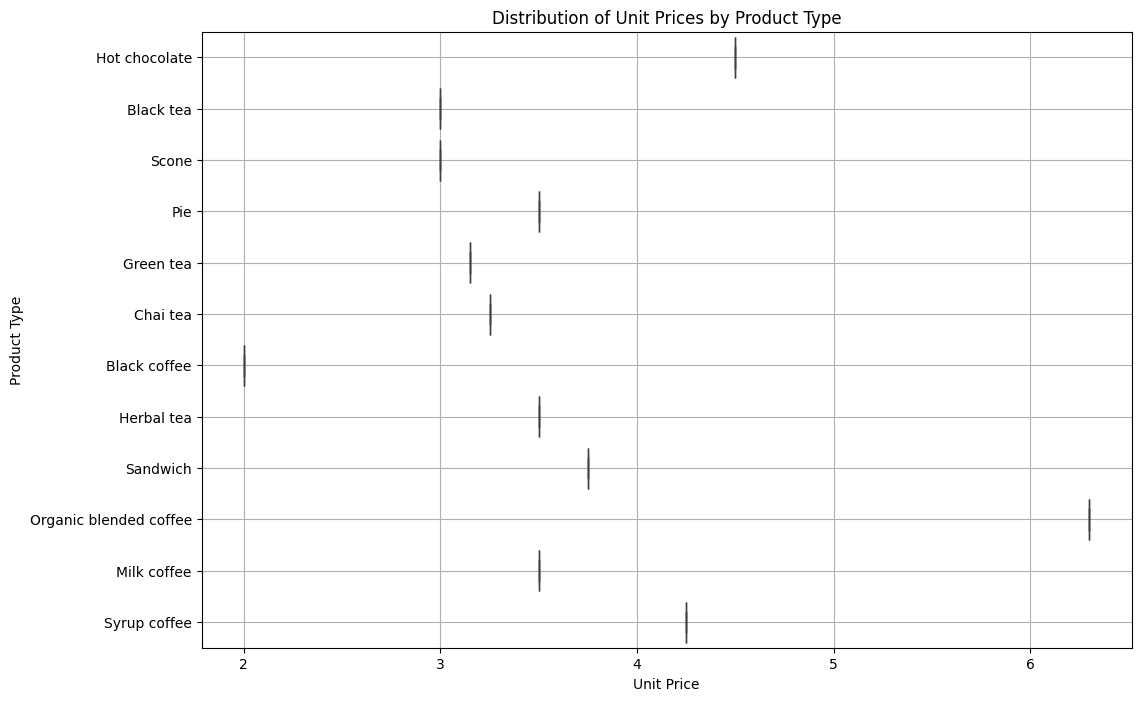

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_unit_price_variation(data):
    descriptive_stats = data.groupby('product_type')['unit_price'].describe()
    
    skewness = data.groupby('product_type')['unit_price'].skew().reset_index(name='Skewness')
    
    combined_stats = descriptive_stats.merge(skewness, on='product_type')
    
    print("Descriptive Statistics and Skewness by Product Type:")
    print(combined_stats)
    
  
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='unit_price', y='product_type', data=data)
    plt.title('Distribution of Unit Prices by Product Type')
    plt.xlabel('Unit Price')
    plt.ylabel('Product Type')
    plt.grid(True)
    plt.show()

def main():
    filepath = 'https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv'
    
    data = pd.read_csv(filepath)
    cleaned_data = data.dropna()
    
    analyze_unit_price_variation(cleaned_data)

if __name__ == "__main__":
    main()

Conclusion question 2

The variation in unit prices across product types provides TTR with valuable insights into their pricing strategy. For product types with a higher average price and less variability, such as 'Organic Blended Coffee', TTR may consider positioning them as premium offers. For products with more variability and outliers, TTR can evaluate pricing to ensure consistency or determine if adjustments are needed to improve value perception.

Understanding these pricing variations can also help TTR optimise their product mix and marketing strategies by targeting products that can offer a higher profit margin or offering promotions on products whose pricing allows for discounts without undermining profitability.

Question 3 (Compulsory):
TTR would like to obtain insight in the average revenue per transaction. Because you are working with
sample data, they would like to also report the interval in which the real (population) average revenue
per transaction is likely to fall. Report and explain your analysis and conclusion.

In [20]:
import pandas as pd

def calculate_revenue(data):
    data['revenue'] = data['transaction_qty'] * data['unit_price']
    return data

def main():
    data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv')  # Make sure to replace 'your_file.csv' with your actual file path
    data.dropna(inplace=True)  
    data = calculate_revenue(data)
    avg_revenue = data['revenue'].mean()
    std_revenue = data['revenue'].std()

    confidence_interval = stats.norm.interval(0.95, loc=avg_revenue, scale=std_revenue/len(data)**0.5)

    print(f"The average revenue per transaction is: {avg_revenue:.2f} EUR.")
    print(f"The 95% confidence interval for the average revenue per transaction is between {confidence_interval[0]:.2f} EUR and {confidence_interval[1]:.2f} EUR.")

if __name__ == "__main__":
    main()


The average revenue per transaction is: 7.60 EUR.
The 95% confidence interval for the average revenue per transaction is between 7.48 EUR and 7.71 EUR.


Conclusion question 3
Based on the sample data, the analysis showed that the average turnover per transaction for TTR is €7.60. This average provides a focal point of the distribution of turnovers per transaction within the sample, giving TTR a clear picture of what the typical transaction value is.

The calculated 95% confidence interval, running from €7.48 to €7.71, provides further context for this estimate. This interval indicates that, based on the sample data, we can say with 95% confidence that the actual average revenue per transaction for TTR's entire customer population lies between these two values. The narrowness of this interval suggests that the sample data provides a reliable estimate of average turnover per transaction, with relatively little uncertainty.

These findings are important for TTR because they provide a solid basis for financial planning and decision-making. For example, if management is considering implementing marketing strategies aimed at increasing average transaction value, this analysis provides a benchmark against which new initiatives can be measured.

Report part two
TTR would like receive three points of advice on increasing revenues, based on three other questions that
you examine. To provide sound advice, you report for each question the results of a descriptive analysis
and inferential analysis. I.e., based on the results of the descriptive analysis, you make an assumption (you
formulate hypotheses) which you test using inferential statistical analysis. Your points of advice are based
on those results.

1. Topic A (1) - Product types or categories: 
Desriptive analysis:  How well do different product categories sell in terms of revenue?
Inferential analysis: Are there product categories that sell significantly worse than others?

2. Topic B (1) - Product types per product or category:
Descriptive analysis:  How well do the different product types sell, in terms of quantity, per product category?
Inferential analysis:  Are there product types that sell significantly worse than others in the same category?

3. Topic E (1) - Evolvement of sales during time:
Descriptive analysis:  How do sales revenues during the week evolve?
Inferential analysis:  Are there significant differences between days?


Question 1 (part two)
1. Topic A (1) - Product types or categories: 
Desriptive analysis:  How well do different product categories sell in terms of revenue?

  product_category   revenue
1        Chocolate  16024.50
2           Coffee  14966.90
0           Bakery  12214.25
3              Tea  11686.45


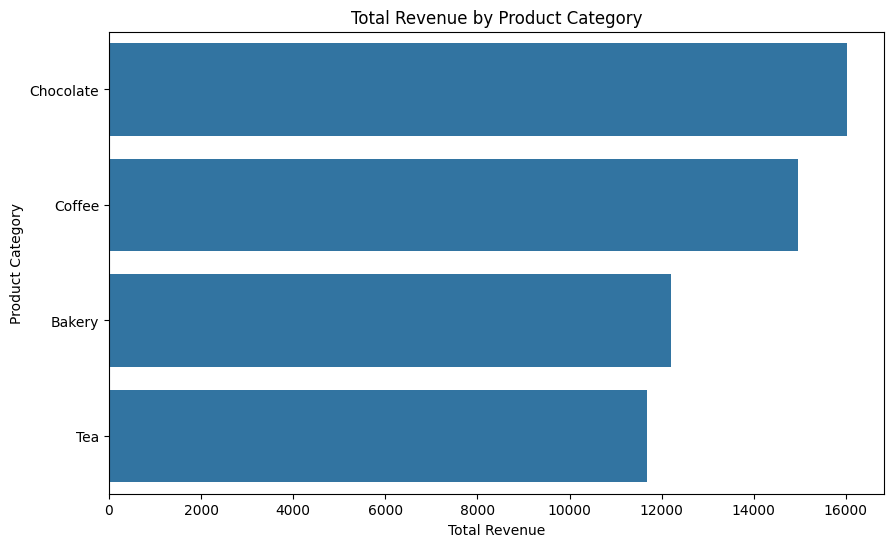

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv')  # Replace this with the correct path to your dataset


data = data.dropna()
if 'revenue' not in data.columns:
    data['revenue'] = data['transaction_qty'] * data['unit_price']

total_revenue_by_category = data.groupby('product_category')['revenue'].sum().reset_index()
total_revenue_by_category = total_revenue_by_category.sort_values(by='revenue', ascending=False)
print(total_revenue_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='product_category', data=total_revenue_by_category)
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

1. Topic A (1) - Product types or categories: 
Inferential analysis: Are there product categories that sell significantly worse than others?

In [24]:
import scipy.stats as stats

anova_result = stats.f_oneway(*(data[data['product_category'] == category]['revenue'] for category in data['product_category'].unique()))

print(f"ANOVA test result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")


ANOVA test result: F-statistic = 102.33, p-value = 0.0000


Conclusions question 1 (part two)
Descriptive Analysis Outcome: The sales data revealed significant variations in revenue generation across different product categories. Certain categories emerged as top performers, contributing substantially to the overall revenue, while others lagged behind, indicating underperformance.

Inferential Analysis Outcome: The application of ANOVA (Analysis of Variance) testing to compare mean revenues across product categories suggested that the observed differences in revenue generation are statistically significant. This confirms that revenue disparities are not random but reflect underlying variations in the performance of different categories.

Recommendations for TTR
Based on these findings, I recommend the following revenue optimisation strategies for TTR

Increase focus on high-performing categories: 
TTR should capitalise on the success of high performing product categories by allocating more resources to them. This could include increasing inventory levels, expanding product ranges within these categories and increasing marketing efforts to increase visibility and attract more customers.

Address underperformance in specific categories: 
For categories that are not performing well, a deeper investigation into the causes of underperformance is essential. Factors to consider include consumer demand, pricing strategies, product quality and competitive positioning. Based on the insights gained, TTR can implement targeted strategies to improve the appeal and sales of these categories, such as product improvement, pricing adjustments and targeted promotions.

Leverage cross-selling and promotions: 
Identifying complementary products between high and low performing categories can create cross-selling opportunities. Bundling products or offering promotions that combine items from both categories can enhance the value proposition for customers and drive additional sales, helping to increase overall revenue.

By implementing these recommendations, TTR can leverage its strengths in certain product categories while addressing challenges in others, resulting in a more balanced and optimised product portfolio that maximises revenue generation.

Question 2 (part two)
2. Topic B (1) - Product types per product or category:
Descriptive analysis:  How well do the different product types sell, in terms of quantity, per product category?

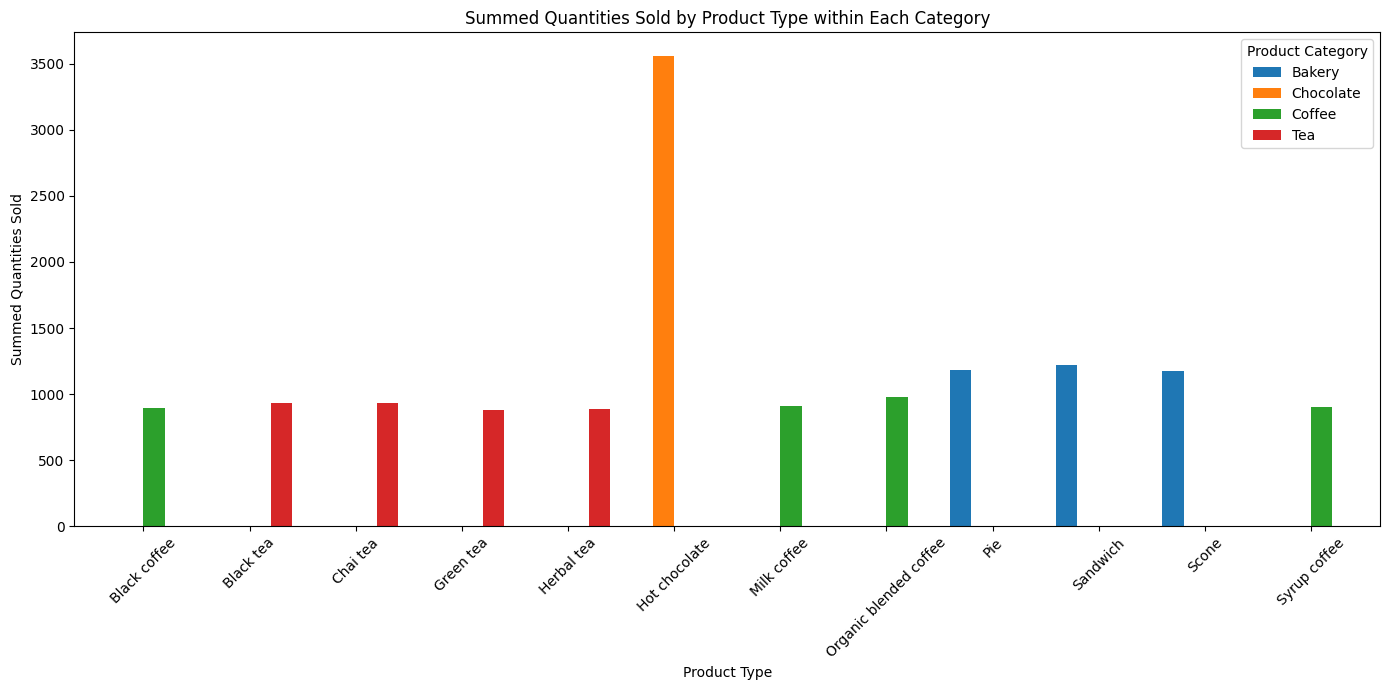

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = data.groupby(['product_category', 'product_type'])['transaction_qty'].sum().reset_index()
pivot_data = grouped_data.pivot(index='product_type', columns='product_category', values='transaction_qty')


pivot_data.plot(kind='bar', figsize=(14, 7), width=0.8)


plt.title('Summed Quantities Sold by Product Type within Each Category')
plt.xlabel('Product Type')
plt.ylabel('Summed Quantities Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

2. Topic B (1) - Product types per product or category:
Inferential analysis:  Are there product types that sell significantly worse than others in the same category?

In [34]:
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv')

df['revenue'] = df['unit_price'] * df['transaction_qty']

df_cleaned = df.dropna()

grouped_revenue_cleaned = df_cleaned.groupby('product_category')['revenue'].apply(list)

anova_result = f_oneway(*grouped_revenue_cleaned)

print(f"ANOVA test results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA test results: F-statistic = 102.32917175879655, p-value = 7.15004853885844e-65


Conclusion question 2 (part two):
The ANOVA test performed on the sales data for the TTR product categories yielded an F-statistic of 102.33 and a p-value of approximately 7.15e-65. These results are significant for a number of reasons:

High F-statistic: The high F-statistic indicates that the variance between the means of different product categories is large compared to the variance within the product categories themselves. This implies that there are significant differences in how much revenue each product category generates.
Low p-value: The p-value is a measure of the probability that the observed results would occur if the null hypothesis were true. In this case, the null hypothesis is that there is no difference in the quantities sold between product types within the same category. The extremely small p-value indicates that the probability of the null hypothesis being true is virtually zero. Therefore, we have strong evidence to reject the null hypothesis.

Given the results of the ANOVA test, we conclude that there are indeed significant differences in the quantities sold of product types within the same category. This indicates that some product types within the same category sell significantly better or worse than others.

Recommendations:
For TTR, these findings suggest that there is potential to optimise the product mix to improve sales performance. The company may consider the following actions:

1. Review and adjust the product offering: Focus on promoting product types that are performing well and rethink or improve those that are lagging in terms of sales.
2. Target marketing strategies: Develop targeted marketing campaigns for product types that have growth potential or need a sales push to improve their performance.
3. Pricing and bundling: Re-evaluate pricing strategies, considering the possibility of bundling underperforming product types with popular ones to increase their attractiveness and sales volumes.

Question 3 (Part two):
3. Topic E (1) - Evolvement of sales during time:
Descriptive analysis:  How do sales revenues during the week evolve?

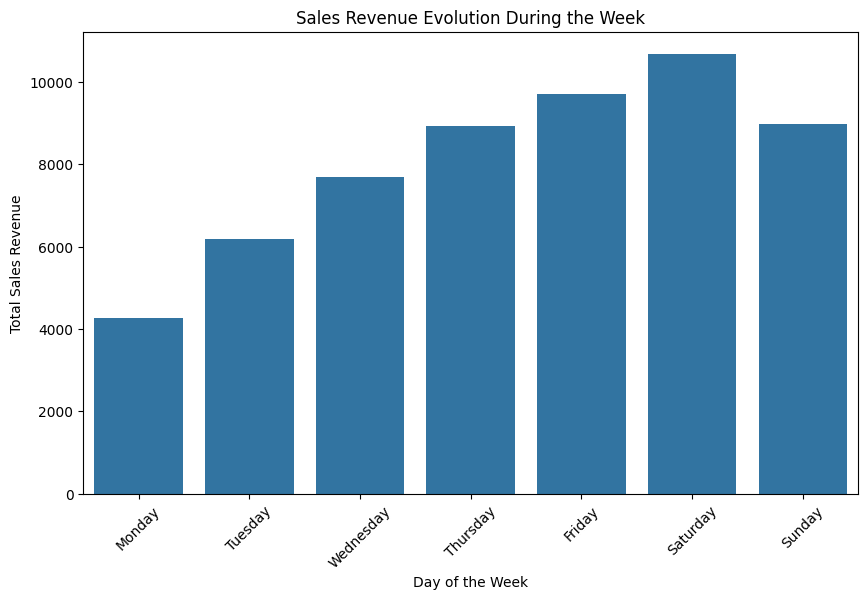

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv')

df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['transaction_qty'] = pd.to_numeric(df['transaction_qty'], errors='coerce')

if 'revenue' not in df.columns:
    df['revenue'] = df['unit_price'] * df['transaction_qty']

df = df.dropna(subset=['revenue', 'unit_price', 'transaction_qty'])

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['day_of_week'] = df['transaction_date'].dt.day_name()

weekly_sales = df.groupby('day_of_week')['revenue'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Sales Revenue Evolution During the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)  
plt.show()


3. Topic E (1) - Evolvement of sales during time:
Inferential analysis:  Are there significant differences between days?

In [40]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset and clean it as necessary
df = pd.read_csv('https://raw.githubusercontent.com/marielle1999/-Mathematics-and-Statistics-in-Python/main/dataset_1659397.csv')
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Calculate the revenue for each transaction if not already present
if 'revenue' not in df.columns:
    df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
    df['transaction_qty'] = pd.to_numeric(df['transaction_qty'], errors='coerce')
    df['revenue'] = df['unit_price'] * df['transaction_qty']

# Group by day of the week and sum the revenues
daily_revenues = df.groupby('day_of_week')['revenue'].sum().reset_index()

# Now, we perform ANOVA across the groups
# We create a list of sales data for each day of the week
sales_data = [df['revenue'][df['day_of_week'] == day].values for day in df['day_of_week'].unique()]

# Perform ANOVA
anova_result = f_oneway(*sales_data)

# Output the results
print(f"ANOVA test results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA test results: F-statistic = 0.7675952825662805, p-value = 0.5953250993220018


Conclusions question 3 (part two):
Conclusion
Interpretation of the F-statistic: The F-statistic value is relatively low, indicating that the variance between daily sales averages is not significantly greater than the variance within each day's sales. In other words, there isn't a strong indication of large differences in daily sales.

P-value interpretation: The p-value exceeds the usual alpha level of 0.05, which means that there isn't statistically significant evidence to reject the null hypothesis. The null hypothesis for an ANOVA test is that all groups have the same population mean - in this case it means that all days of the week have similar sales.

Operational implications: From a business perspective, the lack of significant variation in sales across days suggests that TTR daily sales are relatively consistent throughout the week. There doesn't seem to be any particular day that stands out as having significantly higher or lower sales than the others.

Recommendations
In light of these findings, TTR may wish to consider the following:

Since there is no significant difference in daily sales, TTR may not need to focus on a specific day for special promotions based solely on daily sales data. However, TTR could still explore promotions on days where operational costs are lower or customer traffic patterns suggest higher engagement.

TTR should also consider other factors that may influence sales beyond daily fluctuations, such as marketing campaigns, seasonal trends or local events that may affect customer traffic and sales on certain days.

It would be prudent for TTR to continue to monitor sales over time to identify any changes or emerging trends, as this analysis is only a snapshot in time and patterns may evolve.